In [1]:
# Libraries for Data Preprocessing
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegressionCV
import sklearn.neighbors
from sklearn.model_selection import GridSearchCV

# Libraries for measuring accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
from matplotlib.legend_handler import HandlerBase
#from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from matplotlib.text import Text

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import plot_tree

import requests
import io

# Data Preparation

In [2]:
#Create DataFrame to read Data

# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/tunji01/TeessideProjects/main/HeartData.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

heart = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe

print(heart)

       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \

In [3]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
#To check Dataframe structure
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
#To check the numerical structure of the Dataframe
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
#To find the number of rows and columns
heart.shape

(319795, 18)

In [7]:
heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

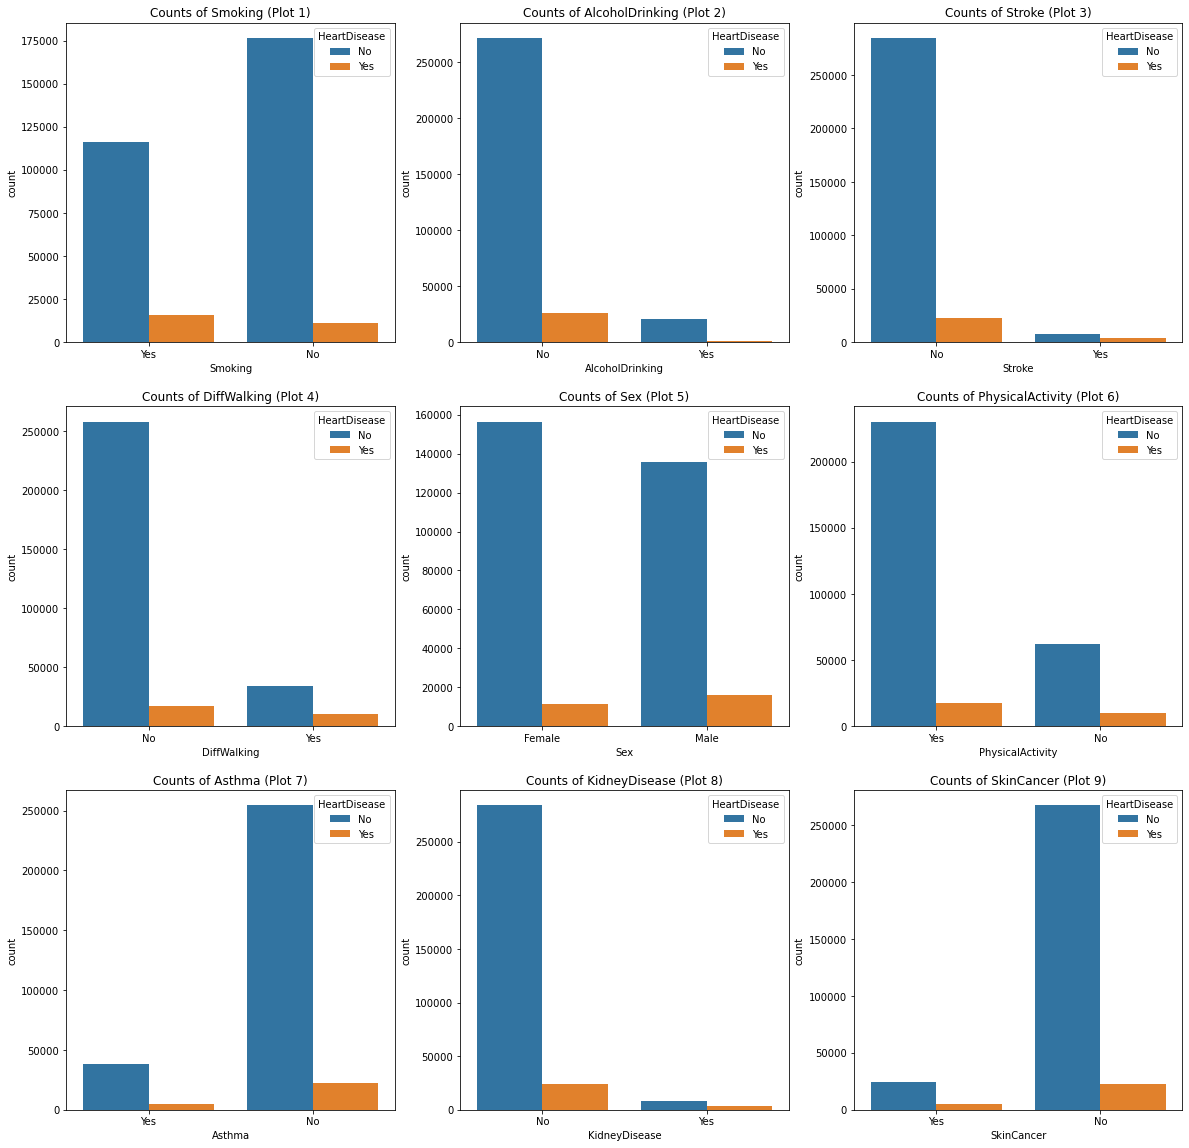

In [8]:
# This list of lists contains all the columns which have binary categorical values
colRange = [['Smoking','AlcoholDrinking','Stroke'],['DiffWalking','Sex','PhysicalActivity'],['Asthma','KidneyDisease','SkinCancer']]
# This function prints the countplots counting the number of people in each category
def printCount(cols):
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    row=0
    col=0
    p_count=1
    for row in range(3):
        for col in range(3):
            # reads column name from the list
            column = colRange[row][col]
            # plots the counts of the particular column
            sns.countplot(ax=axes[row,col],x=heart[column],hue=heart['HeartDisease'])
            # sets the title of the corresponding plot along with plot number
            axes[row,col].set_title("Counts of {} (Plot {})".format(column,p_count))
            p_count += 1
# Calling the function
printCount(colRange)

Observations


Plot 1 - According to the plot people who smoke have a higher chance of Heart Diseases than people who do not 


Plot 2 - According to the plot people who do not drink alcohol have a lower of Heart Disease


Plot 3 - According to the plot people having Heart Disease have a lower chance of having a Stroke


Plot 4 - According to the plot people who do not have any difficulty in walking have a lower chance of Heart Disease


Plot 5 - According to the plot Males have a higher chance of Heart Disease than Females


Plot 6 - According to the plot People who participate in Physical Activity cause Heart Diseases


Plot 7 - According to the plot People who have asthma have a lower chance of Heart Disease

In [9]:
#Understanding Target Variables
heart.HeartDisease.unique()

array(['No', 'Yes'], dtype=object)

There is need to convert the target variable from categorical variable to binary

Checking Heart Disease among Different Races

Text(0.5, 1.0, 'Variation of Heart Disease amoung Races')

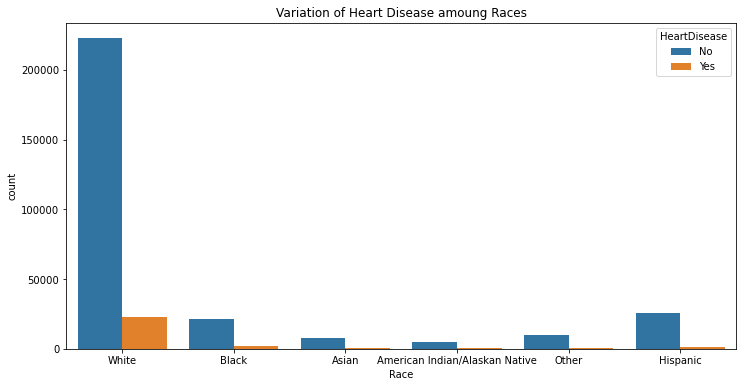

In [10]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# countplot plots the counts of each type of value in a particular column
# hue property is used to color code the counts according to a second categorical variable.
# plotting the graph
sns.countplot(heart['Race'],hue=heart['HeartDisease'])
plt.title('Variation of Heart Disease amoung Races')

Plotting Variation of BMI with Heart Disease

Text(0.5, 1.0, 'Distribution of BMI Among People')

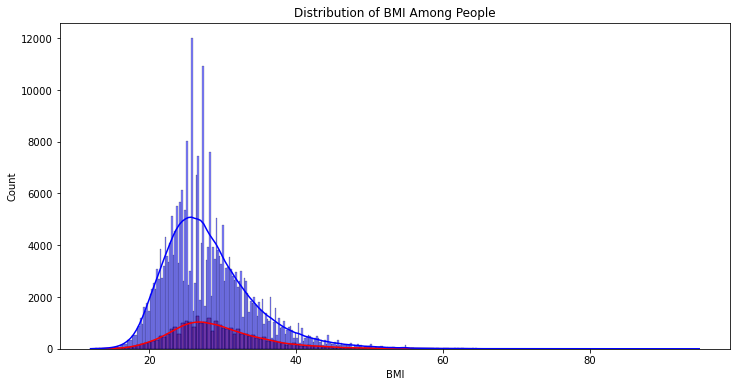

In [11]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# histplot plots the distribution of values in the particular column
# kde plots 'kernel distribution estimate' of that particular column
# plotting both graph on top of each other
sns.histplot(data=heart[heart['HeartDisease']=='Yes'],x='BMI',kde=True,color='red')
sns.histplot(data=heart[heart['HeartDisease']=='No'],x='BMI',kde=True,color='blue')
plt.title('Distribution of BMI Among People')

Observation
People with heart disease have a higher BMI than people who don't have heart disease

Checking variation of Physical Health among people with and without Heart Disease

Text(0.5, 1.0, 'Physical Health Pattern')

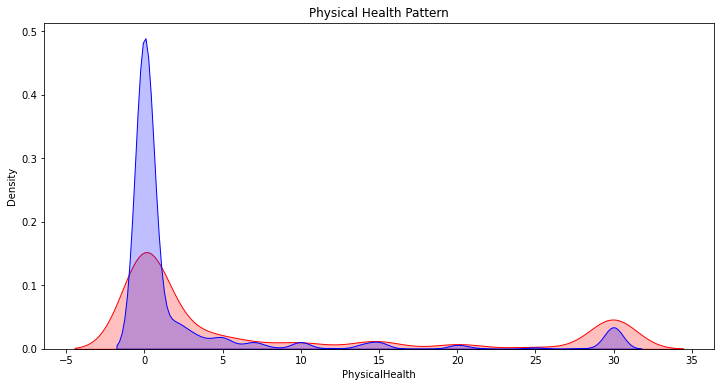

In [12]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# kdeplots show an estimated, smooth distribution of a single numerical variable
# plotting both graphs on top of each other
sns.kdeplot(heart[heart['HeartDisease']=='Yes']['PhysicalHealth'],shade=True,color='red')
sns.kdeplot(heart[heart['HeartDisease']=='No']['PhysicalHealth'],shade=True,color='blue')
plt.title('Physical Health Pattern')

Observation
People with Heart Disease have a lower Physical Health

Checking Variation of Mental health among people with and without Heart Diseases

Text(0.5, 1.0, 'Variation of Mental Health')

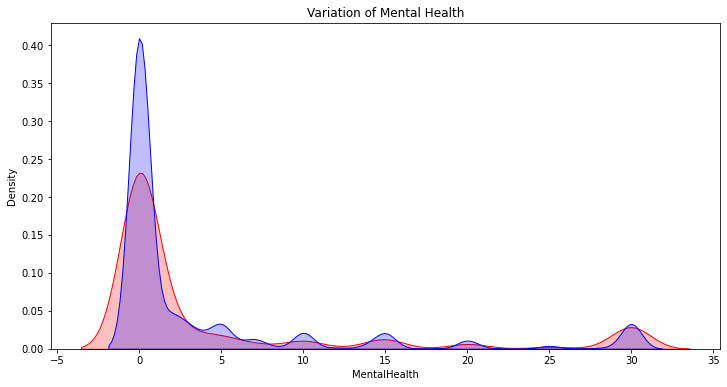

In [13]:
# This statement enlarges the image
plt.figure(figsize=(12,6))
# plotting both graphs on top of each other
sns.kdeplot(heart[heart['HeartDisease']=='Yes']['MentalHealth'],shade=True,color='red')
sns.kdeplot(heart[heart['HeartDisease']=='No']['MentalHealth'],shade=True,color='blue')
plt.title('Variation of Mental Health')

Observation
People with Heart Disease have a lower Mental Health

In [15]:
#Understanding Target Variables
heart.HeartDisease.unique()

array(['No', 'Yes'], dtype=object)

Target variable is  categorical.
HeartDiseaseorAttack" score is either Yes or No ;where yes having a heart issue and No not having a heart issue

In [16]:
#To identify the categorical features and the unique values
for feature in heart.select_dtypes(include = 'object').columns:
    print(feature)
    print (heart[feature].unique())
    

HeartDisease
['No' 'Yes']
Smoking
['Yes' 'No']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity
['Yes' 'No']
GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma
['Yes' 'No']
KidneyDisease
['No' 'Yes']
SkinCancer
['Yes' 'No']


These categorical data requires transformation

# Data Transformation

Encoding all Binary Categorical Columns

In [28]:
heart_transformed = heart.copy()
print("copy of dataset formed")

copy of dataset formed


In [29]:

def transform_leb(x):
  le = LabelEncoder()
  Encoded_le = le.fit_transform(x)
  return Encoded_le

In [30]:
catagoral_labels = ["HeartDisease","Smoking","AlcoholDrinking","Stroke","AgeCategory","DiffWalking","Sex","Race","Diabetic","PhysicalActivity","GenHealth","Asthma","KidneyDisease","SkinCancer"]
for x in catagoral_labels:
  heart_transformed[x] = transform_leb(heart_transformed[x])

Verifying data

In [31]:
heart_transformed.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


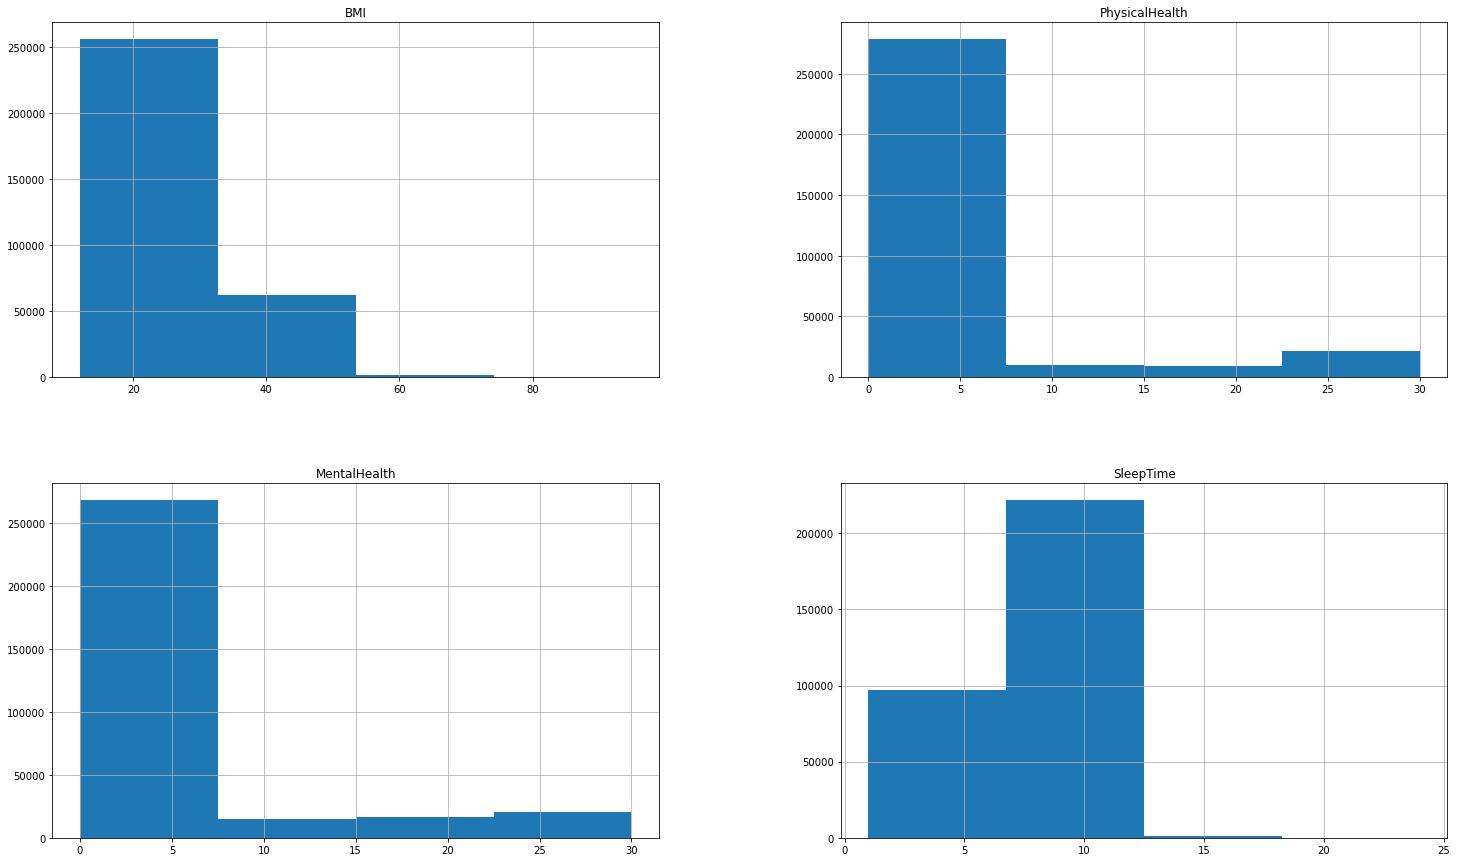

In [32]:
#Distribution of Continous Numerical Features
heart.hist(bins=4, figsize=(25,15))

plt.show()

# Analysis of Target Variable

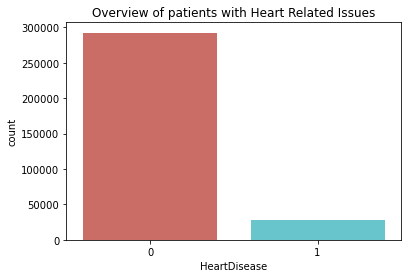

In [33]:
 #Construct plot
sns.countplot(x ='HeartDisease', data = heart_transformed, palette = 'hls')
plt.title('Overview of patients with Heart Related Issues')
plt.show()

In [34]:
#Visualization of Target Variable
#https://www.kaggle.com/code/rajeshjnv/heart-disease-exploration-ml-prediction
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "HeartDisease"
grouped = heart_transformed[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target Variable(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [35]:
heart_transformed['HeartDisease'].groupby(heart_transformed['HeartDisease']).count()

HeartDisease
0    292422
1     27373
Name: HeartDisease, dtype: int64

# Checking for correlation

<AxesSubplot:>

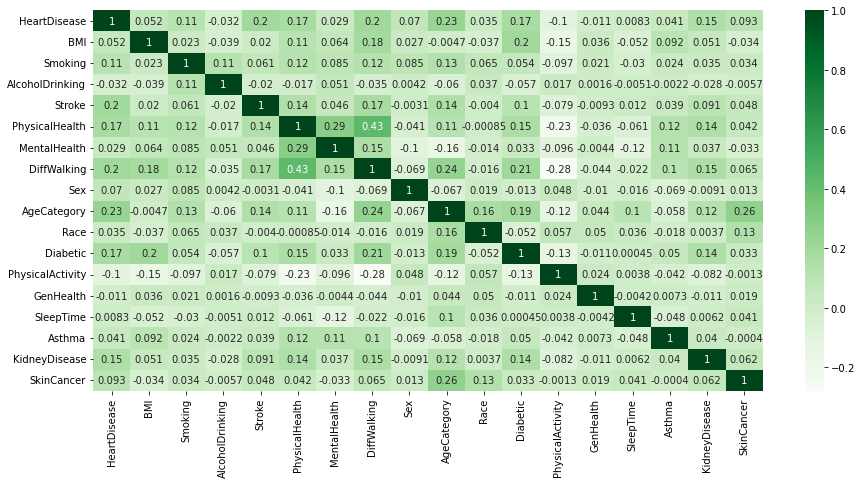

In [36]:
## Checking for correlation
cor_mat=heart_transformed.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,cmap='Greens',annot=True)

Dark shades represents positive correlation while lighter shades represents negative correlation.

In [37]:
#To validate for Outliers
l = heart_transformed.columns.values
len(l)

18

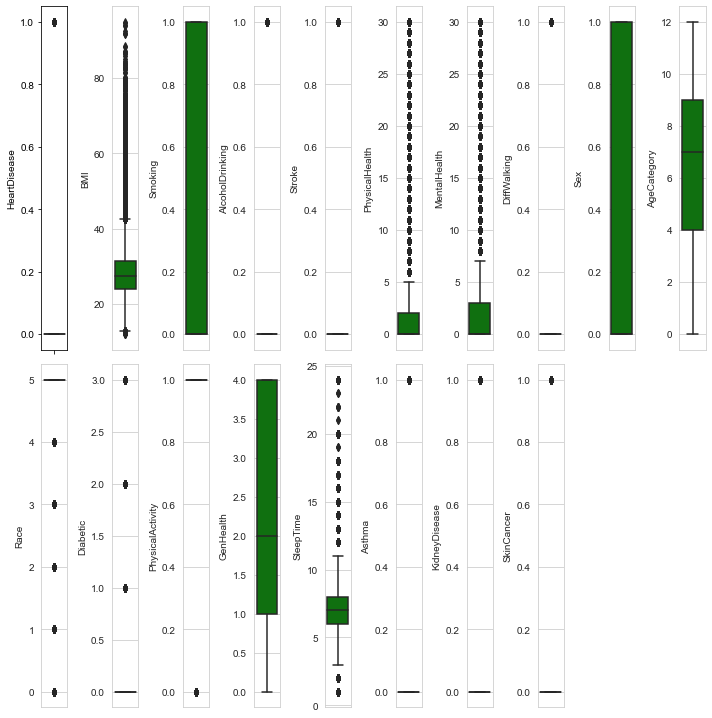

In [38]:
l = heart_transformed.columns.values
number_of_columns=10
number_of_rows = len(l)-1/number_of_columns
#plt.figure(figsize=(number_of_columns,5*number_of_rows),)
plt.figure(figsize=(number_of_columns,5*number_of_rows),)
for i in range(0,len(l)):
    plt.subplot(int(number_of_rows + 1),int(number_of_columns),int(i+1))
    sns.set_style('whitegrid')
    sns.boxplot(y=heart_transformed[l[i]],color='green')
    plt.tight_layout()

In [39]:
#Checking for Duplicates
duplicated_rows = heart_transformed[heart.duplicated()]
print(f'we have {duplicated_rows.shape[0]} duplicated rows in our data.')

we have 18078 duplicated rows in our data.


In [40]:
heart_transformed.loc[heart.duplicated(), :]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,0,19.85,0,0,0,0.0,0.0,0,0,12,5,0,1,0,7.0,0,0,0
3182,0,28.19,0,0,0,0.0,0.0,0,0,6,5,0,1,0,7.0,0,0,0
3397,0,26.54,0,0,0,0.0,0.0,0,1,5,5,0,1,0,6.0,0,0,0
3650,0,32.89,1,0,0,2.0,1.0,0,0,6,5,0,1,2,9.0,0,0,0
4061,0,25.84,0,0,0,0.0,0.0,0,0,4,5,0,1,0,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319671,0,25.06,0,0,0,0.0,0.0,0,1,4,3,0,1,0,7.0,0,0,0
319689,0,27.44,0,0,0,0.0,0.0,0,0,2,3,0,1,4,6.0,0,0,0
319726,0,30.41,0,0,0,0.0,0.0,0,1,0,3,0,1,0,7.0,0,0,0
319751,0,34.96,0,0,0,0.0,0.0,0,1,0,3,0,1,0,6.0,0,0,0


In [31]:
#Drop Duplicates

In [41]:
heart_transformed.drop_duplicates(inplace=True)
print(f'data shape after drop duplicated rows : {heart.shape}')

data shape after drop duplicated rows : (319795, 18)


In [33]:
heart_transformed.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [42]:
y = heart_transformed.HeartDisease
x = heart_transformed.drop(["HeartDisease"],axis = 1)
columns = x.columns.tolist()
columns

['BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [43]:
x.shape

(301717, 17)

# Train test split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [45]:
X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["HeartDisease"] = Y_train

# Data Standardization

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




In [47]:
X_train_df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
197559,16.97,1,0,0,0.0,2.0,0,0,10,5,0,1,4,7.0,0,0,0,0
286926,39.16,0,0,0,0.0,0.0,0,0,3,5,0,0,4,8.0,0,0,0,0
250708,26.97,0,0,1,20.0,0.0,0,1,10,5,2,0,3,7.0,0,1,0,1
155034,24.41,1,0,0,0.0,30.0,0,0,4,5,0,1,4,5.0,0,0,0,0
102540,22.15,0,0,0,0.0,0.0,0,1,10,5,0,1,0,8.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123014,27.57,0,0,0,0.0,0.0,0,0,8,5,2,0,2,6.0,0,0,0,0
273086,17.97,1,0,0,0.0,25.0,0,0,1,4,0,0,2,8.0,1,0,0,0
135728,28.34,0,0,0,9.0,20.0,1,0,8,5,0,0,2,6.0,1,0,0,0
151731,22.43,1,0,0,5.0,30.0,1,0,6,5,2,1,1,6.0,1,0,0,1


# Training Models

# KNN Model

In [40]:
kn = KNeighborsClassifier(n_neighbors = 2)
kn.fit(X_train, Y_train)
y_pred = kn.predict(X_test)
cmatrix = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
print("CM: ",cmatrix)
print("KNN Accuracy: ",accuracy)

CM:  [[57578   789]
 [ 5187   405]]
KNN Accuracy:  0.9065651432949233


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train, Y_train)
y_pred = rforest.predict(X_test)
cmatrix = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
print("CM: ",cmatrix)
print("Random Forest Classifier Accuracy: ",accuracy)

# Logistic Regression Model

In [48]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [49]:
print("Accuracy score of model is ",model.score(X_test,Y_test))

Accuracy score of model is  0.9099993371337664


# Classification report

In [50]:
# Classification report which gives us a combination of evaluation metrics such as (Precision, Recall, F1-score, Support)

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54894
           1       0.51      0.09      0.15      5450

    accuracy                           0.91     60344
   macro avg       0.71      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344



The evaluation metrics for patients without heart disease are on the high side, while the recall score for those without heart disease is low (0.09). Recall is the number of correct positives made from all possible positive predictions that could have been made. 
However, due to the class imbalance , our models performed well for patients without heart disease while it did not perform well in predicting patients with heart disease


# To solve the above problem, this study will adopt the use of Under-Sampling

# Solving imbalance through Under-Sampling:

In [51]:
from imblearn.under_sampling import RandomUnderSampler
sampler = RandomUnderSampler(random_state=42)
X_under, y_under = sampler.fit_resample(x, y)
#X_res, y_res = sampler.fit_resample(X, y)



# Train test split :

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.20, random_state=42)


In [53]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((43617, 17), (43617,), (10905, 17), (10905,))

In [54]:
X_under.shape , y_under.shape

((54522, 17), (54522,))

# Scaling data :

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression Model

In [58]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
cmatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("CM: ",cmatrix)
print("Logistic Regression Accuracy: ",accuracy)

CM:  [[4005 1433]
 [1250 4217]]
Logistic Regression Accuracy:  0.753966070609812


# Random Forest Model

In [63]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
cmatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("CM: ",cmatrix)
print("Random Forest Classifier Accuracy: ",accuracy)

CM:  [[3868 1570]
 [1240 4227]]
Random Forest Classifier Accuracy:  0.7423200366804218


# KNN Model

# Using Gridsearch to get the best parameter

In [ ]:
########This has been commented out because it runs for a long time, the best value of n = 45)
#knn = KNeighborsClassifier()
#from sklearn.model_selection import GridSearchCV
#k_range = list(range(1, 50))
#param_grid = dict(n_neighbors=k_range)
  
#### defining parameter range
#grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
#### fitting the model for grid search
#grid_search=grid.fit(X_train, y_train)


In [ ]:
#grid_search.best_params_
#{'n_neighbors': 45}

# Apply the parameter in the model

In [60]:
kn = KNeighborsClassifier(n_neighbors = 45)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
cmatrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("CM: ",cmatrix)
print("KNN Accuracy: ",accuracy)

CM:  [[3862 1576]
 [1069 4398]]
KNN Accuracy:  0.7574507106831728


# Classification report

In [61]:
# Let's make a Classification report which gives us a combination of evaluation metrics such as (Precision, Recall, F1-score, Support)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      5438
           1       0.74      0.80      0.77      5467

    accuracy                           0.76     10905
   macro avg       0.76      0.76      0.76     10905
weighted avg       0.76      0.76      0.76     10905



# ROC curve

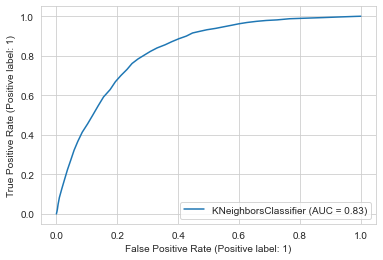

In [62]:
# ROC curve that compares TPR (True Positive Rate) VS FPR (False Positive Rate)

plot_roc_curve(kn, X_test, y_test);

# KNN Model has the highest accuracy of 76% and also gave the best Recall of 80%